In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [ ]:

data = pd.read_csv('/content/drive/MyDrive/2024_datascience/clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


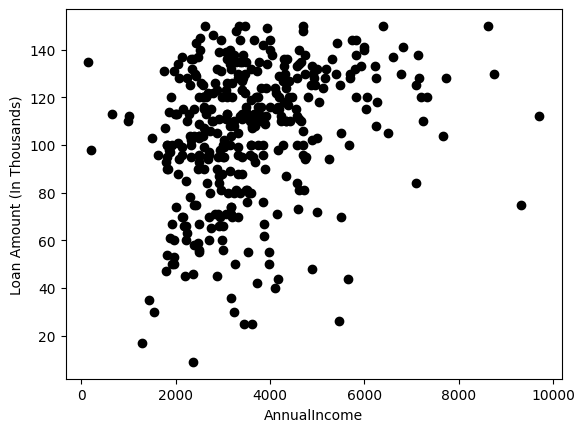

In [ ]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

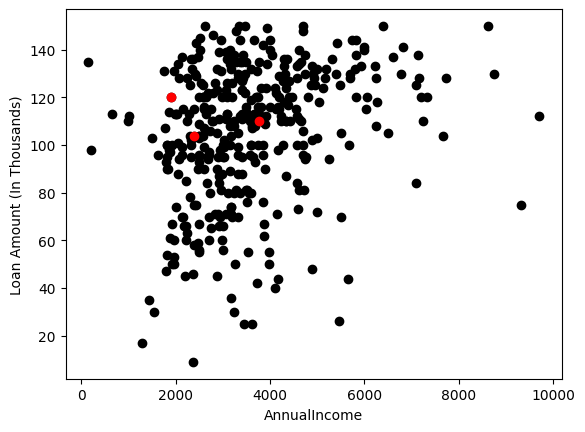

In [ ]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()


In [ ]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

<ipython-input-10-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-10-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-10-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=E

689.165061736076
629.3734955947507
447.52211296382313


<ipython-input-10-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-10-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-10-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

430.69360630337644
373.709075450792
215.94836106251185


<ipython-input-10-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-10-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-10-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

212.11585654878053
320.86544014225217
235.63273762230665


<ipython-input-10-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-10-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-10-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

248.74878646215663
125.16501318300665
52.84741626127729


<ipython-input-10-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-10-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-10-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

98.54724443834282
90.64953219227577


<ipython-input-10-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-10-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-10-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


<ipython-input-10-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-10-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-10-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

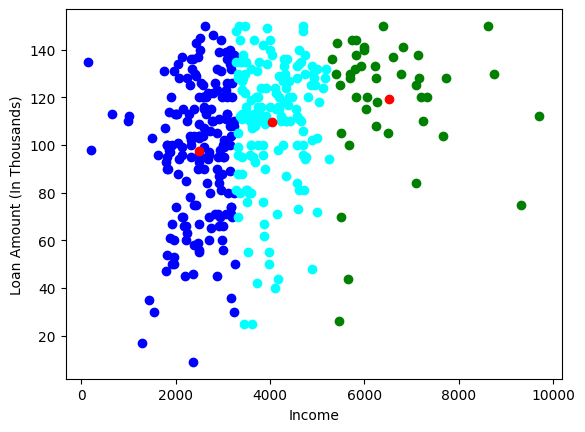

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Initialize medoids randomly
def initialize_medoids(X, K):
    return X.sample(n=K).reset_index(drop=True)

# Function to calculate the total cost (sum of distances) of each point to its medoid
def calculate_total_cost(X, medoids):
    total_cost = 0
    for index, row in X.iterrows():
        distances = []
        for medoid in medoids.itertuples(index=False):
            d = np.sqrt((medoid.ApplicantIncome - row.ApplicantIncome) ** 2 +
                        (medoid.LoanAmount - row.LoanAmount) ** 2)
            distances.append(d)
        total_cost += min(distances)
    return total_cost

# K-medoids algorithm
def k_medoids(X, K):
    # Step 1: Initialize medoids
    medoids = initialize_medoids(X, K)
    X = X.copy()
    diff = 1
    j = 0

    while diff != 0:
        # Step 2: Assign each point to the nearest medoid
        for index1, row_c in medoids.iterrows():
            distances = []
            for index2, row_d in X.iterrows():
                d1 = (row_c["ApplicantIncome"] - row_d["ApplicantIncome"]) ** 2
                d2 = (row_c["LoanAmount"] - row_d["LoanAmount"]) ** 2
                d = np.sqrt(d1 + d2)
                distances.append(d)
            X[index1] = distances

        # Assign clusters based on the closest medoid
        clusters = []
        for index, row in X.iterrows():
            min_dist = row[0]
            pos = 0
            for i in range(K):
                if row[i] < min_dist:
                    min_dist = row[i]
                    pos = i
            clusters.append(pos)
        X["Cluster"] = clusters

        # Step 3: Update medoids
        new_medoids = pd.DataFrame()
        for i in range(K):
            cluster_points = X[X["Cluster"] == i]
            cluster_points = cluster_points.drop(columns=["Cluster"])
            min_cost = float("inf")
            medoid = None
            for index, row in cluster_points.iterrows():
                cost = calculate_total_cost(cluster_points, pd.DataFrame([row]))
                if cost < min_cost:
                    min_cost = cost
                    medoid = row
            new_medoids = pd.concat([new_medoids, pd.DataFrame([medoid])], ignore_index=True)

        # Calculate the total cost to check for convergence
        if j == 0:
            diff = 1
            j += 1
        else:
            old_cost = calculate_total_cost(X, medoids)
            new_cost = calculate_total_cost(X, new_medoids)
            diff = old_cost - new_cost
            print(diff)

        # Update medoids
        medoids = new_medoids

    return X, medoids

# Example usage
# Load your dataset
data = {
    "ApplicantIncome": [5000, 6000, 7000, 8000, 9000],
    "LoanAmount": [200, 300, 400, 500, 600]
}
df = pd.DataFrame(data)

# Number of clusters
K = 2

# Perform K-medoids clustering
clustered_data, final_medoids = k_medoids(df, K)

print(clustered_data)
print(final_medoids)


0.0
   ApplicantIncome  LoanAmount            0            1  Cluster
0             5000         200  2009.975124     0.000000        1
1             6000         300  1004.987562  1004.987562        0
2             7000         400     0.000000  2009.975124        0
3             8000         500  1004.987562  3014.962686        0
4             9000         600  2009.975124  4019.950248        0
   ApplicantIncome  LoanAmount            0            1
0           7000.0       400.0     0.000000  2009.975124
1           5000.0       200.0  2009.975124     0.000000


0.0
   ApplicantIncome  LoanAmount            0            1  Cluster
0             5000         200     0.000000  3014.962686        0
1             6000         300  1004.987562  2009.975124        0
2             7000         400  2009.975124  1004.987562        1
3             8000         500  3014.962686     0.000000        1
4             9000         600  4019.950248  1004.987562        1
   ApplicantIncome  LoanAmount            0            1
0           5000.0       200.0     0.000000  3014.962686
1           8000.0       500.0  3014.962686     0.000000


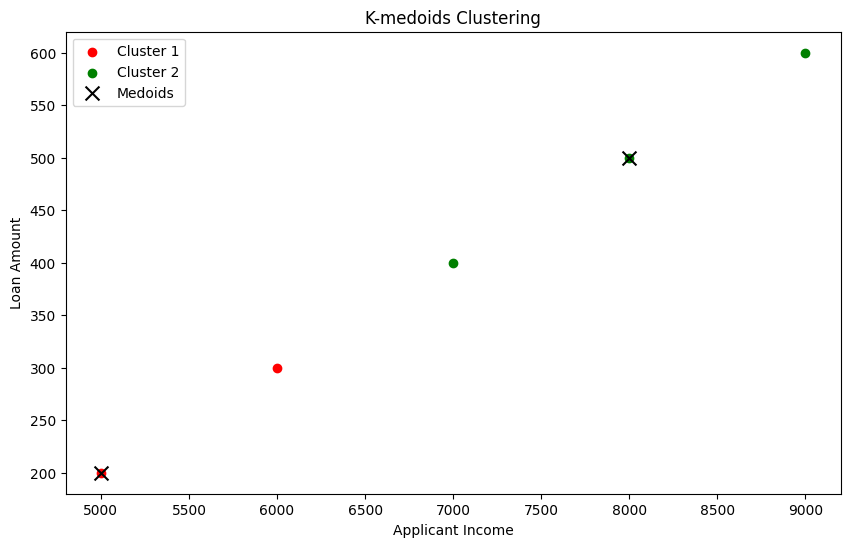

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialize medoids randomly
def initialize_medoids(X, K):
    return X.sample(n=K).reset_index(drop=True)

# Function to calculate the total cost (sum of distances) of each point to its medoid
def calculate_total_cost(X, medoids):
    total_cost = 0
    for index, row in X.iterrows():
        distances = []
        for medoid in medoids.itertuples(index=False):
            d = np.sqrt((medoid.ApplicantIncome - row.ApplicantIncome) ** 2 +
                        (medoid.LoanAmount - row.LoanAmount) ** 2)
            distances.append(d)
        total_cost += min(distances)
    return total_cost

# K-medoids algorithm
def k_medoids(X, K):
    # Step 1: Initialize medoids
    medoids = initialize_medoids(X, K)
    X = X.copy()
    diff = 1
    j = 0

    while diff != 0:
        # Step 2: Assign each point to the nearest medoid
        for index1, row_c in medoids.iterrows():
            distances = []
            for index2, row_d in X.iterrows():
                d1 = (row_c["ApplicantIncome"] - row_d["ApplicantIncome"]) ** 2
                d2 = (row_c["LoanAmount"] - row_d["LoanAmount"]) ** 2
                d = np.sqrt(d1 + d2)
                distances.append(d)
            X[index1] = distances

        # Assign clusters based on the closest medoid
        clusters = []
        for index, row in X.iterrows():
            min_dist = row[0]
            pos = 0
            for i in range(K):
                if row[i] < min_dist:
                    min_dist = row[i]
                    pos = i
            clusters.append(pos)
        X["Cluster"] = clusters

        # Step 3: Update medoids
        new_medoids = pd.DataFrame()
        for i in range(K):
            cluster_points = X[X["Cluster"] == i]
            cluster_points = cluster_points.drop(columns=["Cluster"])
            min_cost = float("inf")
            medoid = None
            for index, row in cluster_points.iterrows():
                cost = calculate_total_cost(cluster_points, pd.DataFrame([row]))
                if cost < min_cost:
                    min_cost = cost
                    medoid = row
            new_medoids = pd.concat([new_medoids, pd.DataFrame([medoid])], ignore_index=True)

        # Calculate the total cost to check for convergence
        if j == 0:
            diff = 1
            j += 1
        else:
            old_cost = calculate_total_cost(X, medoids)
            new_cost = calculate_total_cost(X, new_medoids)
            diff = old_cost - new_cost
            print(diff)

        # Update medoids
        medoids = new_medoids

    return X, medoids

# Example usage
# Load your dataset
data = {
    "ApplicantIncome": [5000, 6000, 7000, 8000, 9000],
    "LoanAmount": [200, 300, 400, 500, 600]
}
df = pd.DataFrame(data)

# Number of clusters
K = 2

# Perform K-medoids clustering
clustered_data, final_medoids = k_medoids(df, K)

print(clustered_data)
print(final_medoids)

# Visualization using matplotlib
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

plt.figure(figsize=(10, 6))
for i in range(K):
    cluster_points = clustered_data[clustered_data["Cluster"] == i]
    plt.scatter(cluster_points["ApplicantIncome"], cluster_points["LoanAmount"],
                c=colors[i % len(colors)], label=f'Cluster {i + 1}')

plt.scatter(final_medoids["ApplicantIncome"], final_medoids["LoanAmount"],
            c='black', marker='x', s=100, label='Medoids')

plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('K-medoids Clustering')
plt.legend()
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:, [3, 4]].values

In [7]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


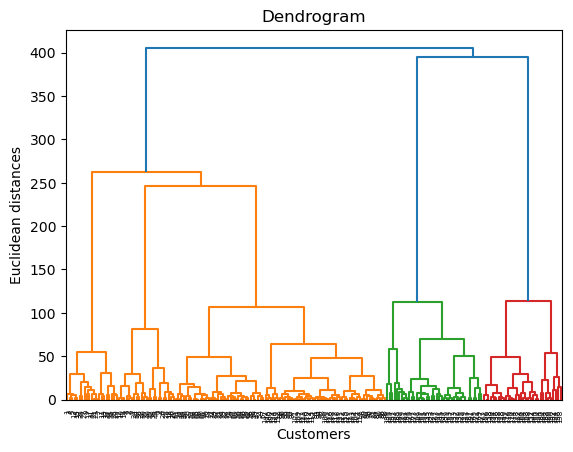

In [8]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

C:\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


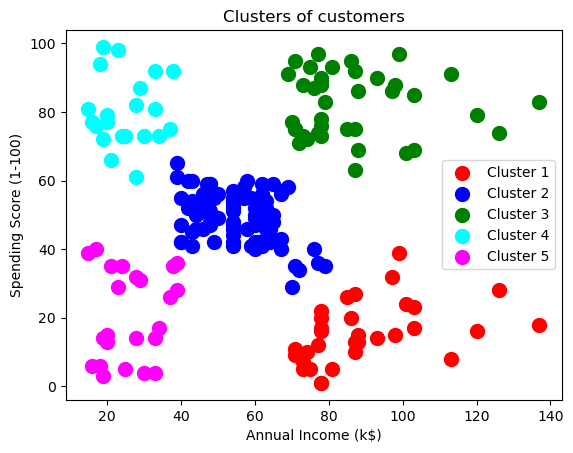

In [9]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = "red", label = "Cluster 1")
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = "blue", label = "Cluster 2")
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = "green", label = "Cluster 3")
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = "cyan", label = "Cluster 4")
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = "magenta", label = "Cluster 5")
plt.title("Clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()